In [10]:
import rebound
import numpy as np
import math

In [11]:
sim = rebound.Simulation()
sim.units = ('hr', 'AU', 'Msun')
sim.integrator = "ias15"

sim.add(m=1e-6)
sim.add(m=1e-34,a=0.00001)

print sim.status()
sim.move_to_com()
print sim.status()

---------------------------------
REBOUND version:     	2.19.1
REBOUND built on:    	Jul  8 2016 20:15:40
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1e-06 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=1e-34 x=1e-05 y=0.0 z=0.0 vx=0.0 vy=0.000226657555073 vz=0.0>
---------------------------------
None
---------------------------------
REBOUND version:     	2.19.1
REBOUND built on:    	Jul  8 2016 20:15:40
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1e-06 x=-1e-33 y=0.0 z=0.0 vx=0.0 vy=-2.26657555073e-32 vz=0.0>
<rebound.Particle object, m=1e-34 x=1e-05 y=0.0 z=0.0 vx=0.0 vy=0.000226657555073 vz=0.0>
---------------------------------
None


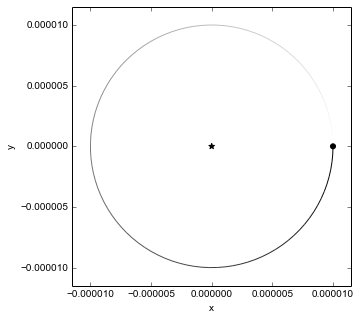

In [12]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline
fig = rebound.OrbitPlot(sim)

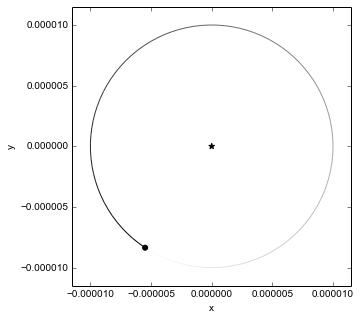

In [13]:
Nout = 100
a_s = np.zeros(Nout)
times = np.linspace(0.,10.*2.*np.pi,Nout)
for i, time in enumerate(times):  
        
    rocketCord = (sim.particles[0].x,sim.particles[0].y,sim.particles[0].z)
    earthCord = (sim.particles[1].x,sim.particles[1].y,sim.particles[1].z)
    distance = (rocketCord[0]-earthCord[0])**2 +(rocketCord[1]-earthCord[1])**2 +(rocketCord[2]-earthCord[2])**2

    if distance>0.01:
        break
    sim.integrate(time)
    a_s[i] = sim.particles[1].a
    
    fig = rebound.OrbitPlot(sim)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

In [14]:
print sim.status()

---------------------------------
REBOUND version:     	2.19.1
REBOUND built on:    	Jul  8 2016 20:15:40
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	62.831853
Current timestep:    	0.007636
---------------------------------
<rebound.Particle object, m=1e-06 x=5.48733565929e-34 y=8.3599729283e-34 z=0.0 vx=-1.89485102441e-32 vy=1.2437460844e-32 vz=0.0>
<rebound.Particle object, m=1e-34 x=-5.48733565929e-06 y=-8.35997292832e-06 z=0.0 vx=0.000189485102441 vy=-0.00012437460844 vz=0.0>
---------------------------------
None


In [16]:
sim2 = rebound.Simulation()
sim2.units = ('hr', 'AU', 'Msun')
sim2.integrator = "ias15"

In [17]:
sim2.add(m=1.)
sim2.add(m=1e-6,a=1.)
sim2.add(m=1e-6,a=2., Omega = 2.35)
sim2.move_to_com() 

In [ ]:
Nout = 10
a_s = np.zeros(Nout)
times = np.linspace(0.,sim.t,Nout)
for i, time in enumerate(times):       
    sim2.integrate(time)  
    fig = rebound.OrbitPlot(sim2)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

In [ ]:
sim2.status()

In [ ]:
rocket = sim.particles[1]
earth = sim2.particles[1]

rocketx = rocket.x+earth.x
rockety = rocket.y+earth.y
rocketz = rocket.z+earth.z

rocketvx = rocket.vx+earth.vx
rocketvy = rocket.vy+earth.vy
rocketvz = rocket.vz+earth.vz

In [ ]:
sim2.add(m=1e-34, x = rocketx, y =rockety,z = rocketz,vx=rocketvx,vy=rocketvy,vz= rocketvz)
sim2.move_to_com()



In [ ]:
# sim2.additional_forces = migrationForce2
# sim2.force_is_velocity_dependent = 1

In [ ]:
Nout = 500
a_s = np.zeros(Nout)
times = np.linspace(0.,5000.*2.*np.pi,Nout)

for i, time in enumerate(times): 
    
    rocketCord = (sim2.particles[3].x,sim2.particles[3].y,sim2.particles[3].z)
    marsCord = (sim2.particles[2].x,sim2.particles[2].y,sim2.particles[2].z)
    distance = (rocketCord[0]-marsCord[0])**2 +(rocketCord[1]-marsCord[1])**2 +(rocketCord[2]-marsCord[2])**2
    
    if distance<0.01:
        break
    
    sim2.integrate(time)
    fig = rebound.OrbitPlot(sim2)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)